In [92]:
import pandas as pd
data = pd.read_csv('TSLA.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [93]:
# Convert the date column to days since the first day
import numpy as np
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = (data['Date'] - data['Date'].min())  / np.timedelta64(1,'D')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,0.0,3.800,5.000,3.508,4.778,4.778,93831500
1,1.0,5.158,6.084,4.660,4.766,4.766,85935500
2,2.0,5.000,5.184,4.054,4.392,4.392,41094000
3,3.0,4.600,4.620,3.742,3.840,3.840,25699000
4,7.0,4.000,4.000,3.166,3.222,3.222,34334500


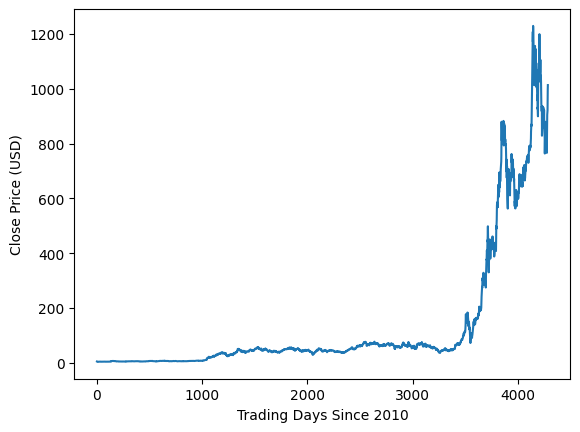

In [94]:
import matplotlib.pyplot as plt
plt.ylabel('Close Price (USD)')
plt.xlabel('Trading Days Since 2010')
plt.plot(data['Date'], data['Close'])
plt.show()

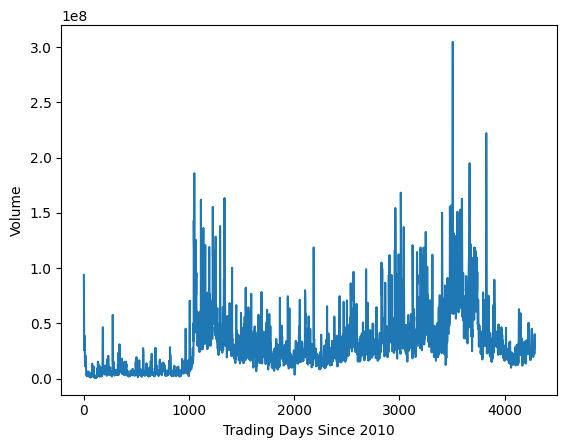

In [95]:
plt.ylabel('Volume')
plt.xlabel('Trading Days Since 2010')
plt.plot(data['Date'], data['Volume'])
plt.show()

In [96]:
# Summary statistics
data.dropna(inplace=True)
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,2143.306495,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,1238.716444,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,0.000000,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,1072.750000,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,2143.500000,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,3216.000000,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,4286.000000,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


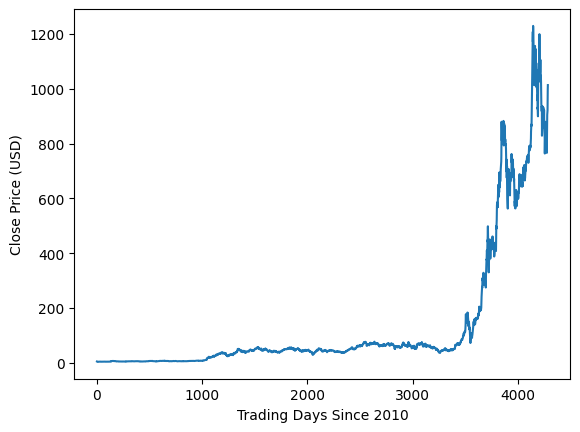

In [97]:
# Look at the past 1 day
plt.ylabel('Close Price (USD)')
plt.xlabel('Trading Days Since 2010')
plt.plot(data['Date'], data['Close'])
plt.show()

In [98]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data['Close'], test_size=0.05, shuffle=False)
print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)
print("y train shape: ", y_train.shape)
print("y test shape: ", y_test.shape)

X train shape:  (2808, 7)
X test shape:  (148, 7)
y train shape:  (2808,)
y test shape:  (148,)


In [99]:
# Create a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

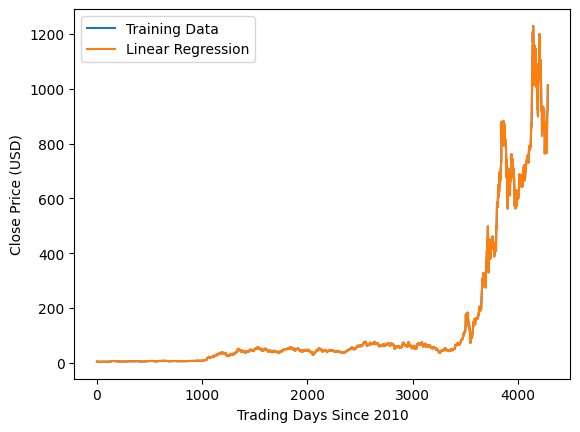

In [104]:
plt.xlabel('Trading Days Since 2010')
plt.ylabel('Close Price (USD)')
plt.plot(data['Date'], data['Close'], label='Training Data')
plt.plot(data['Date'], model.predict(data), label='Linear Regression')
plt.legend()